### 한글 깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


### 제주특별자치도의 성별 분포를 항아리 모양 그래프로 표현

찾고 싶은 지역의 이름을 알려주세요 : 제주특별자치도


ValueError: ignored

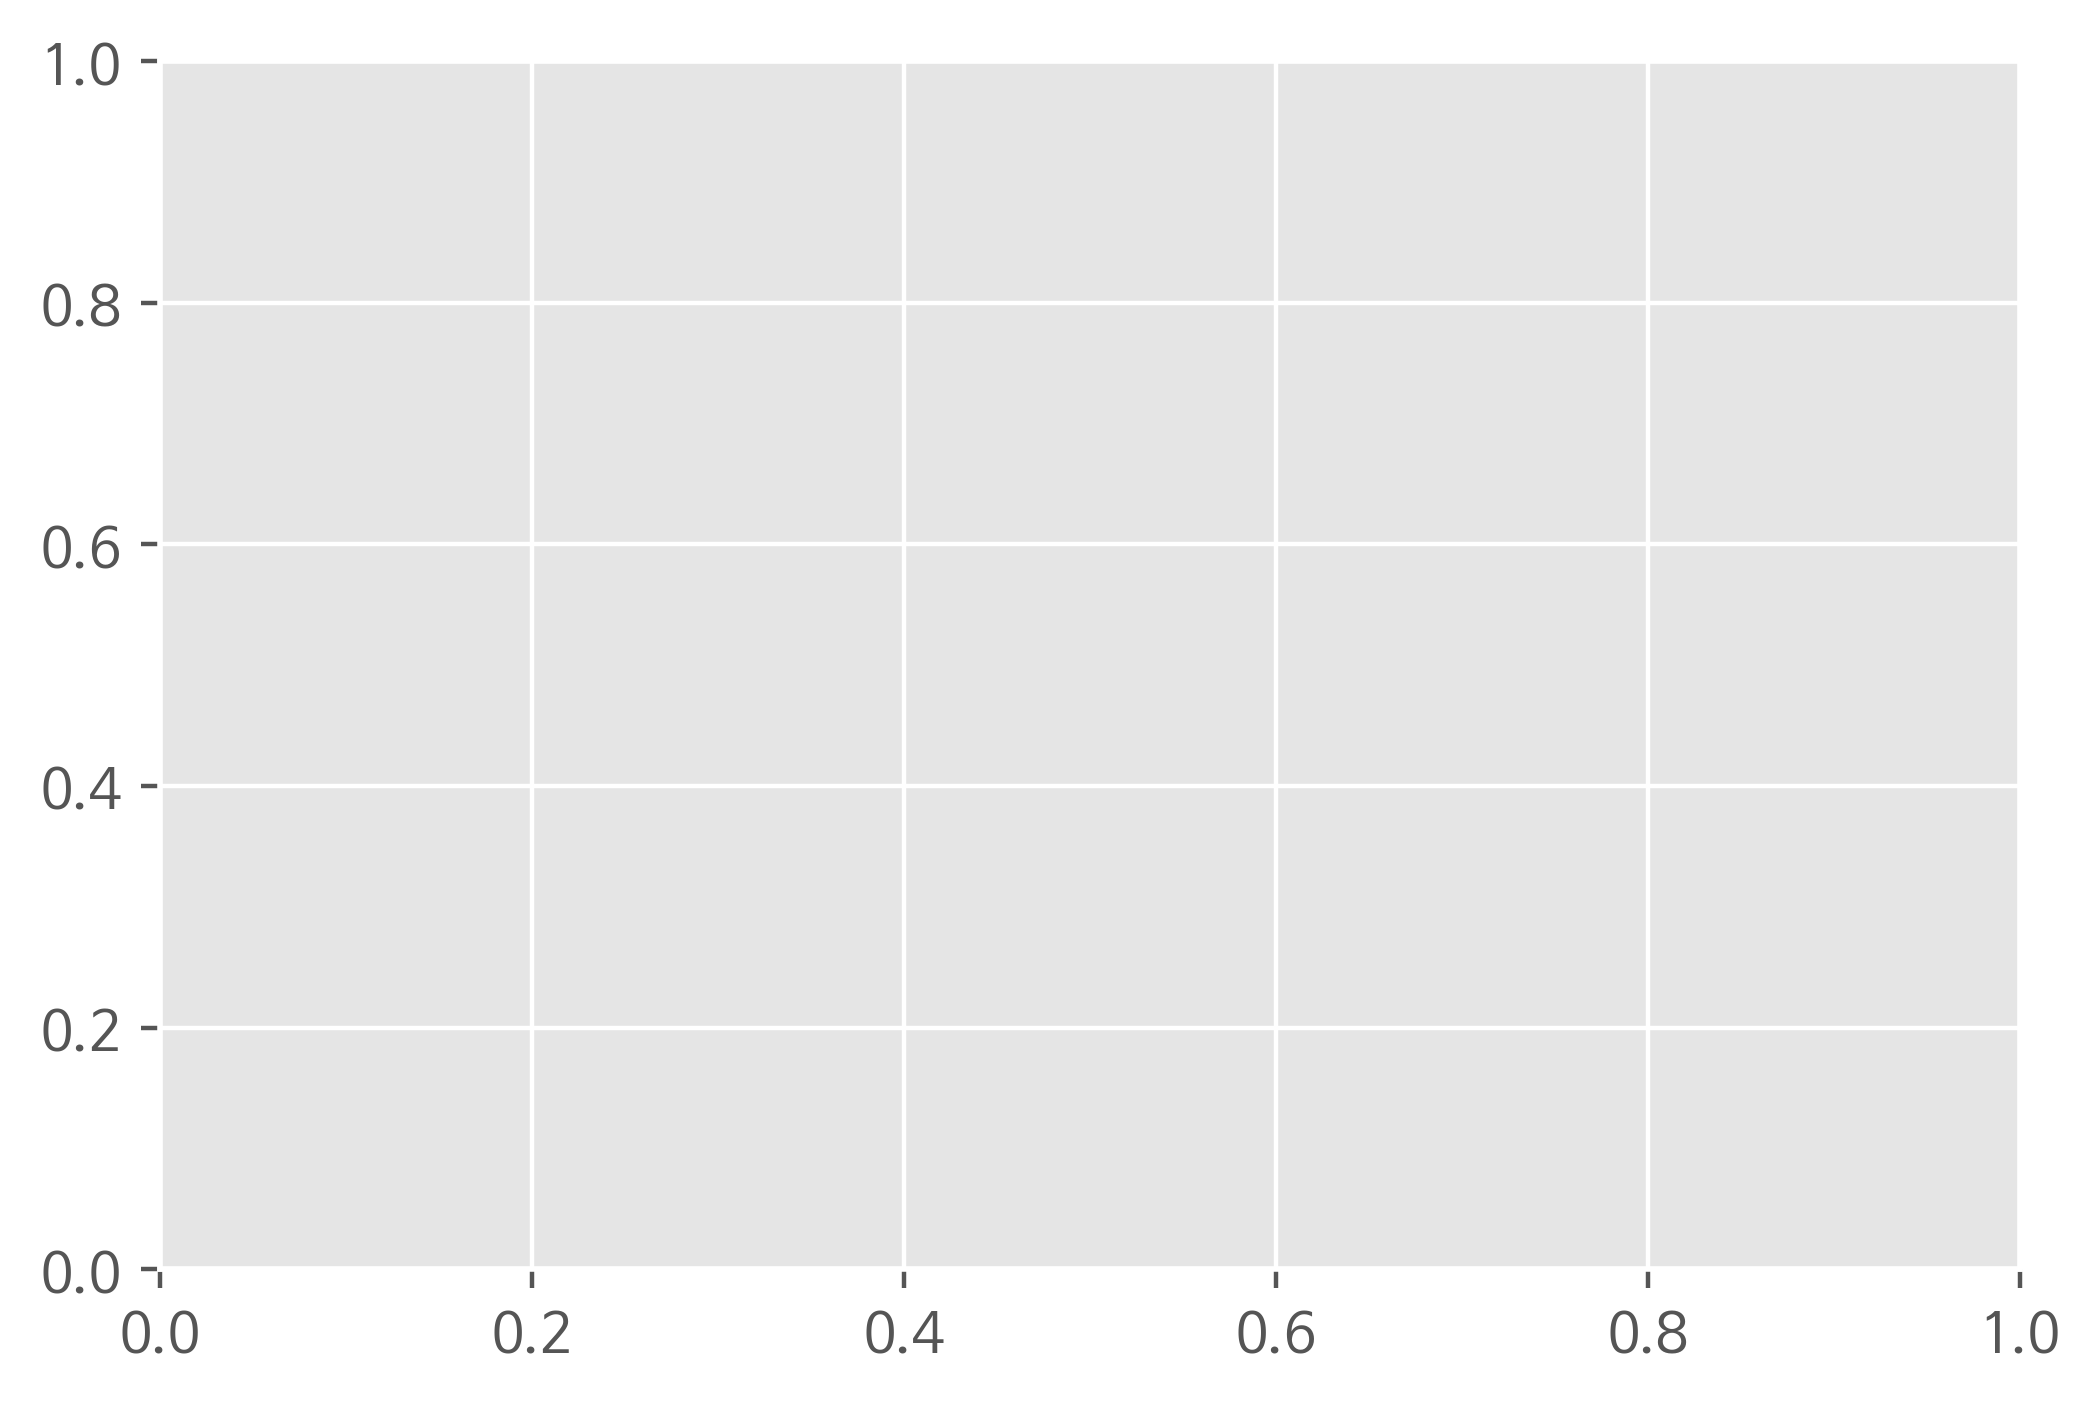

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv',encoding="cp949")
data = csv.reader(f)

m = []
f = []
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')

for row in data:
  if name in row[0]:
    for i in row[3:104]:
      m.append(-int(i.replace(',','')))
    for i in row[106:]:
      f.append(int(i.replace(',','')))

plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.style.use('ggplot') #격자 무늬 스타일로 지정

plt.barh(range(101), m, color= 'steelblue', label='남자')
plt.barh(range(101), f, color= 'tomato', label='여자')
plt.title(name+'지역의 남녀 성별 인구 분포')

plt.legend()
plt.show()


제주특별자치도 데이터 확인 -> 101개여야 하는데, <br>
46배 큰 값 : 제주도 포함된 지역 이름이 총 46건

In [ ]:
print(len(m), len(f))

4646 4646


한 행만 가져오고 싶으면 : break문 이용

찾고 싶은 지역의 이름을 알려주세요 : 대전광역시


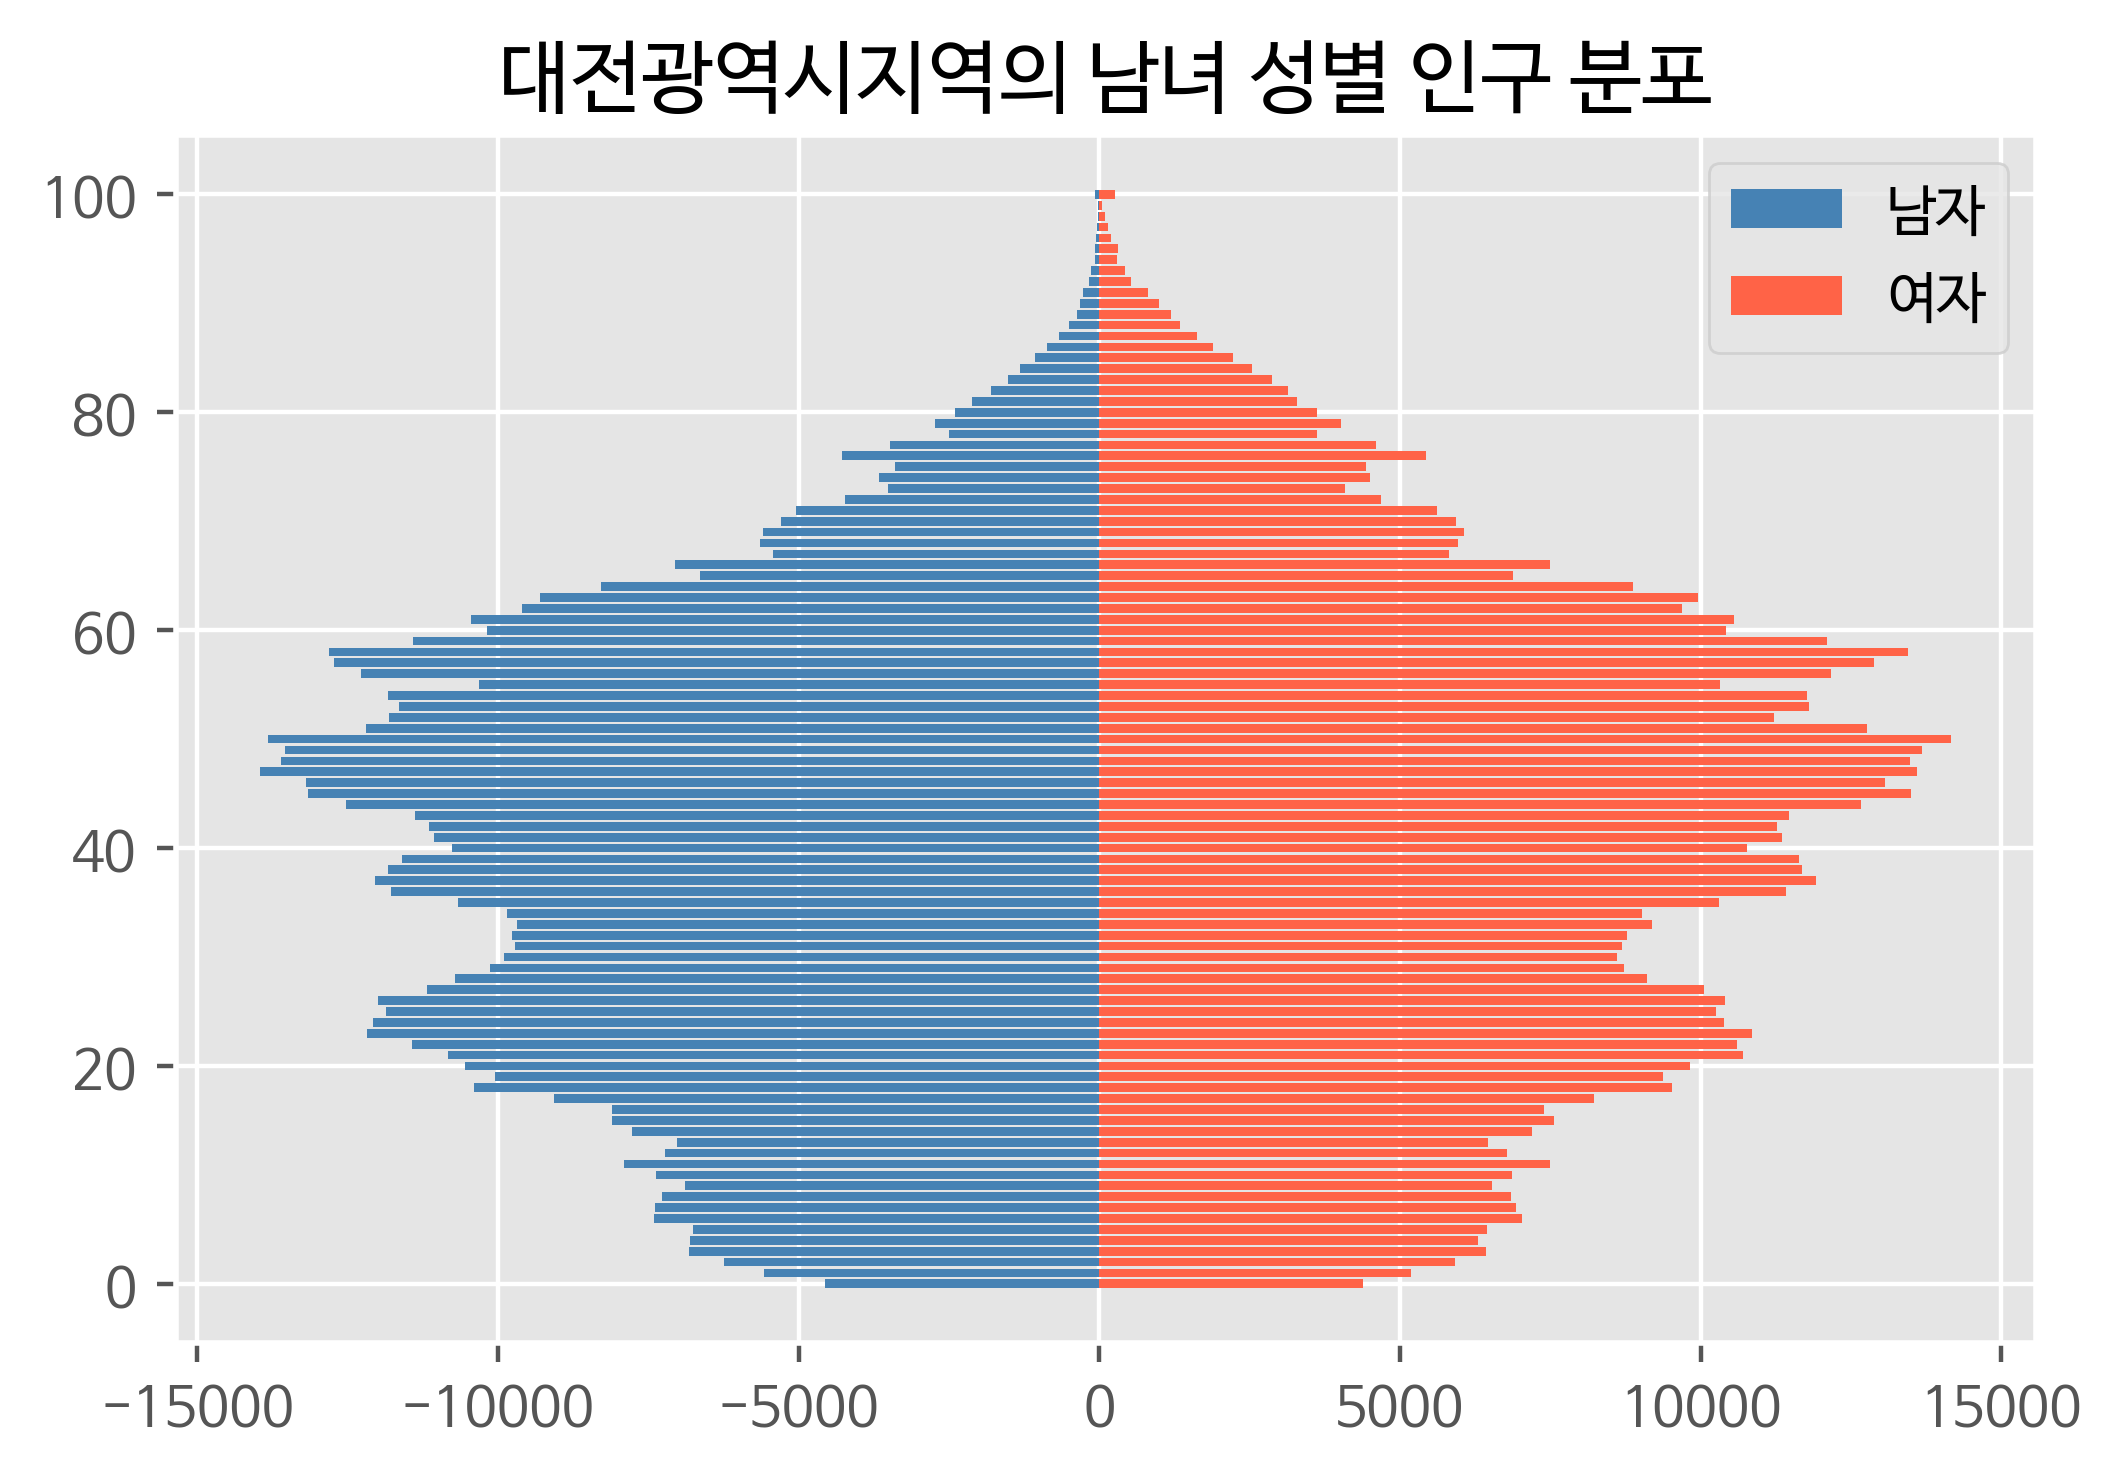

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv',encoding="cp949")
data = csv.reader(f)

m = []
f = []
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')

for row in data:
  if name in row[0]:
    for i in row[3:104]:
      m.append(-int(i.replace(',','')))
    for i in row[106:]:
      f.append(int(i.replace(',','')))
    break

plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.style.use('ggplot') #격자 무늬 스타일로 지정

plt.barh(range(101), m, color= 'steelblue', label='남자')
plt.barh(range(101), f, color= 'tomato', label='여자')
plt.title(name+'지역의 남녀 성별 인구 분포')

plt.legend()
plt.show()

### 항아리 모양의 그래프는 연령대별 인구 차이 확인 가능 <br>
but 어떤 성별이 더 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie


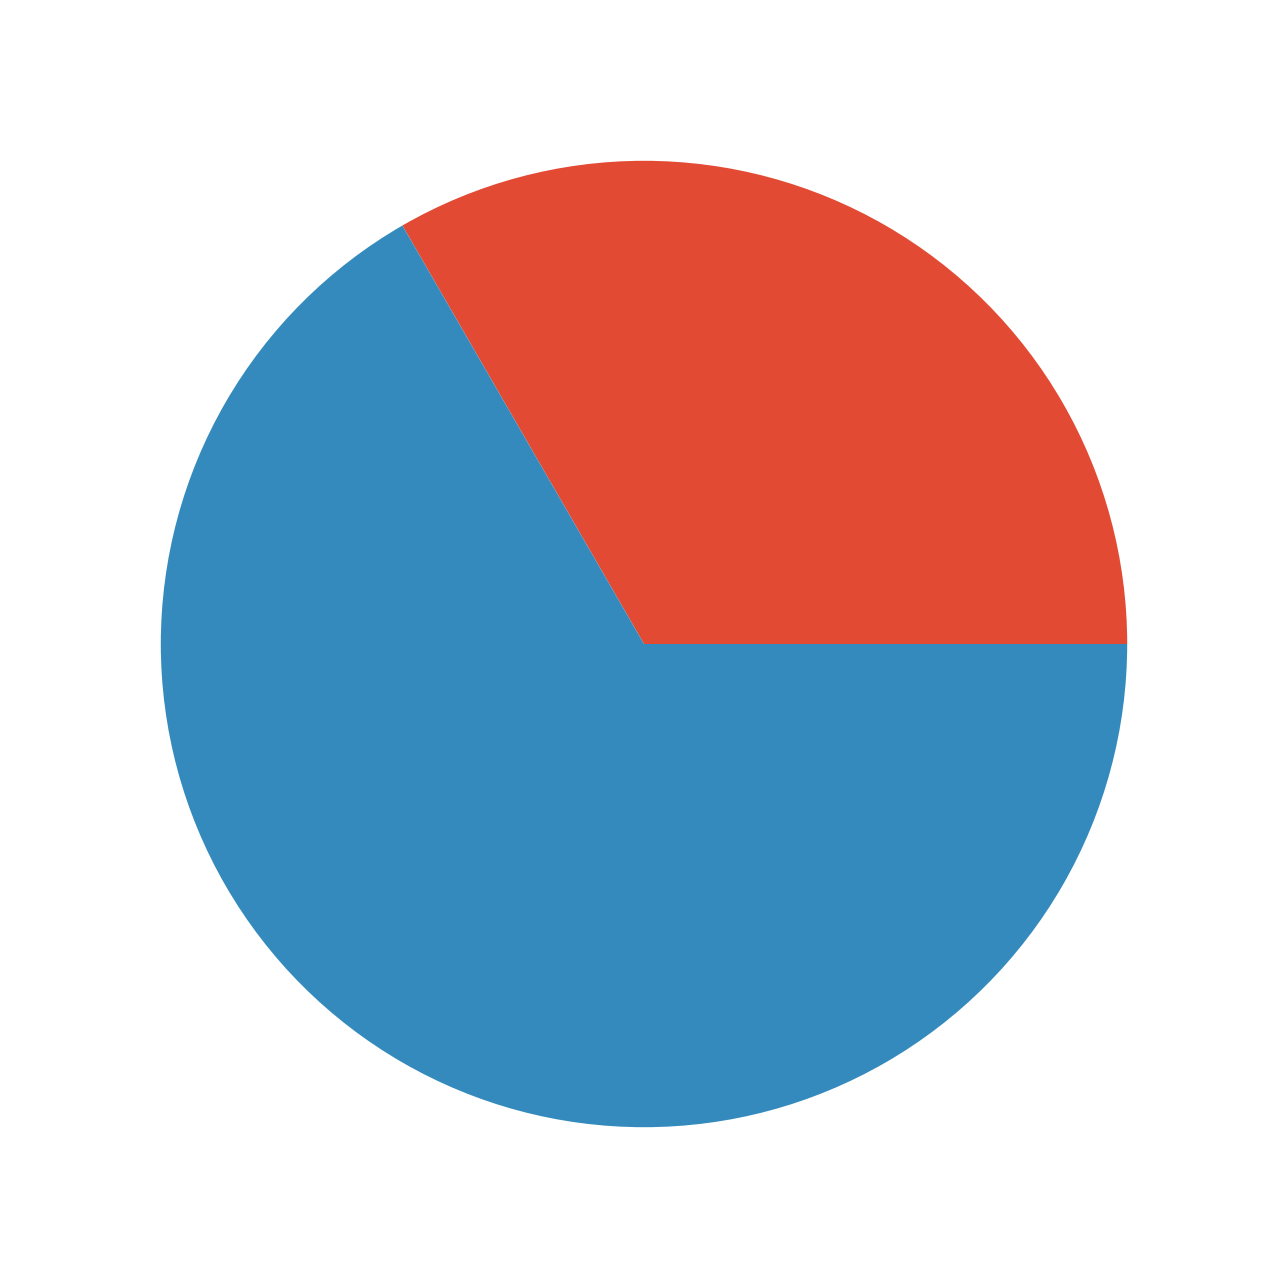

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.pie([10,20]) #pie(x) : x가 가지고 있는 값을 비율로 표시
plt.show()

비율 및 범례 표시하기

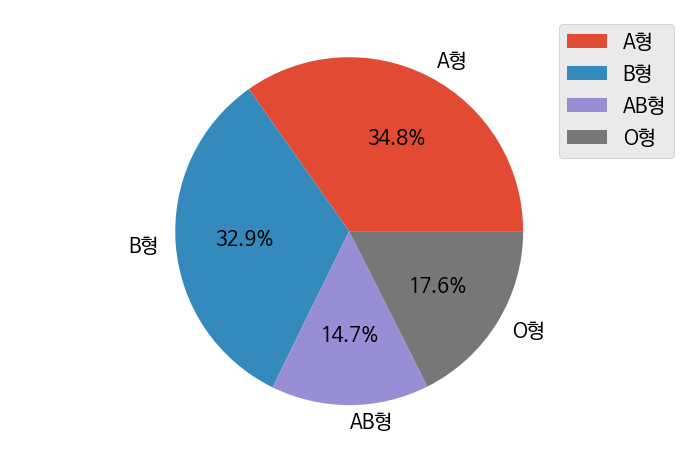

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
size = [2441,2312,1031,1233] #pie(x) : x가 가지고 있는 값을 비율로 표시
label = ['A형','B형','AB형','O형']
plt.axis('equal')
plt.pie(size,labels=label,autopct='%.1f%%')
plt.legend()
plt.show()

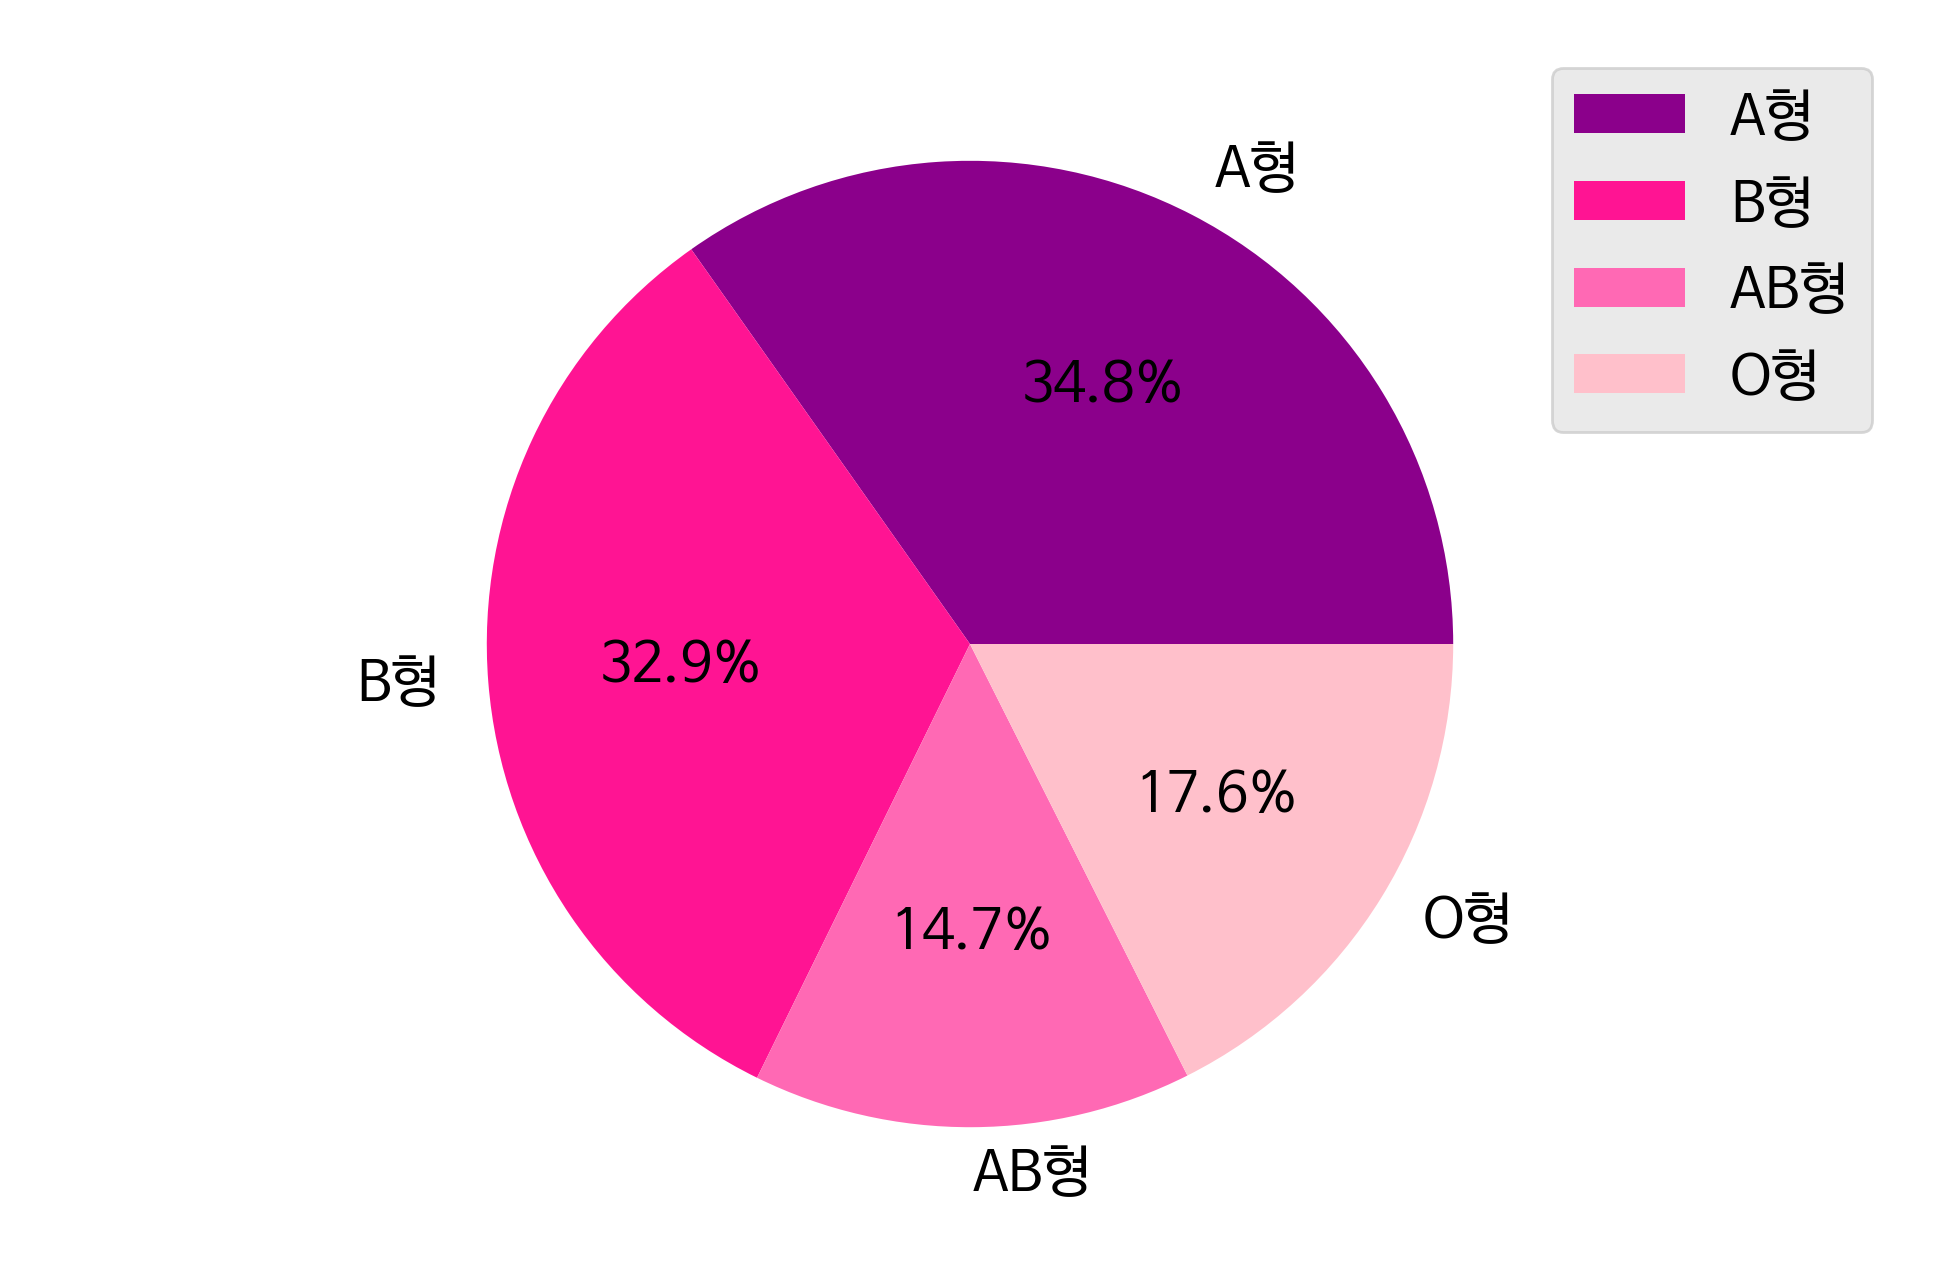

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)

plt.rc('font', family='NanumBarunGothic') 
size = [2441,2312,1031,1233] #pie(x) : x가 가지고 있는 값을 비율로 표시
label = ['A형','B형','AB형','O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal')
plt.pie(size,labels=label,autopct='%.1f%%',colors=color)
plt.legend()
plt.show()

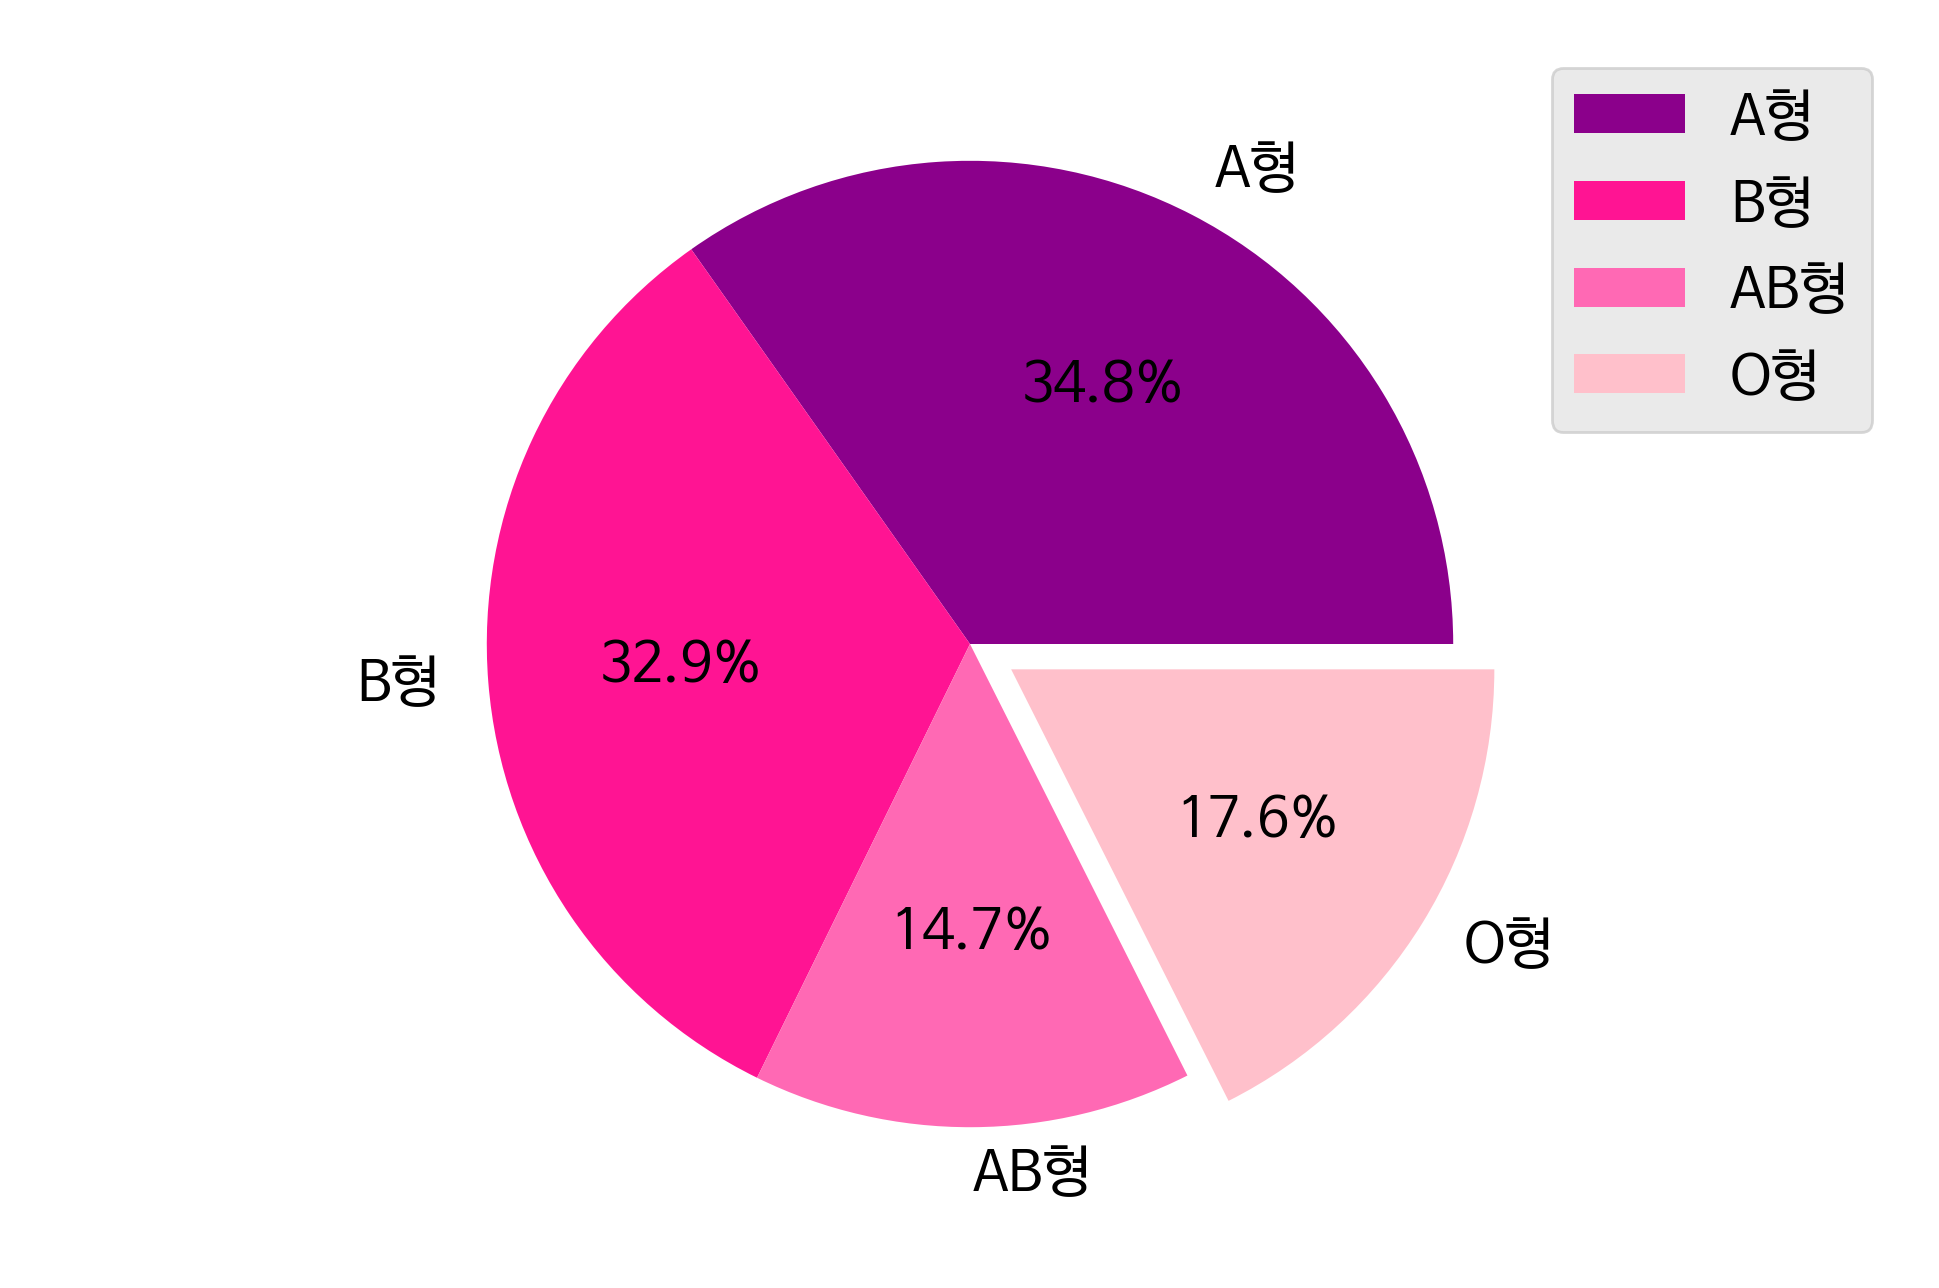

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)

plt.rc('font', family='NanumBarunGothic') 
size = [2441,2312,1031,1233] #pie(x) : x가 가지고 있는 값을 비율로 표시
label = ['A형','B형','AB형','O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal')
plt.pie(size,labels=label,autopct='%.1f%%',colors=color,explode=(0,0,0,0.1))
plt.legend()
plt.show()

### 제주도의 성별 인구 비율 표현하기

찾고 싶은 지역의 이름을 알려주세요 : 전라북도


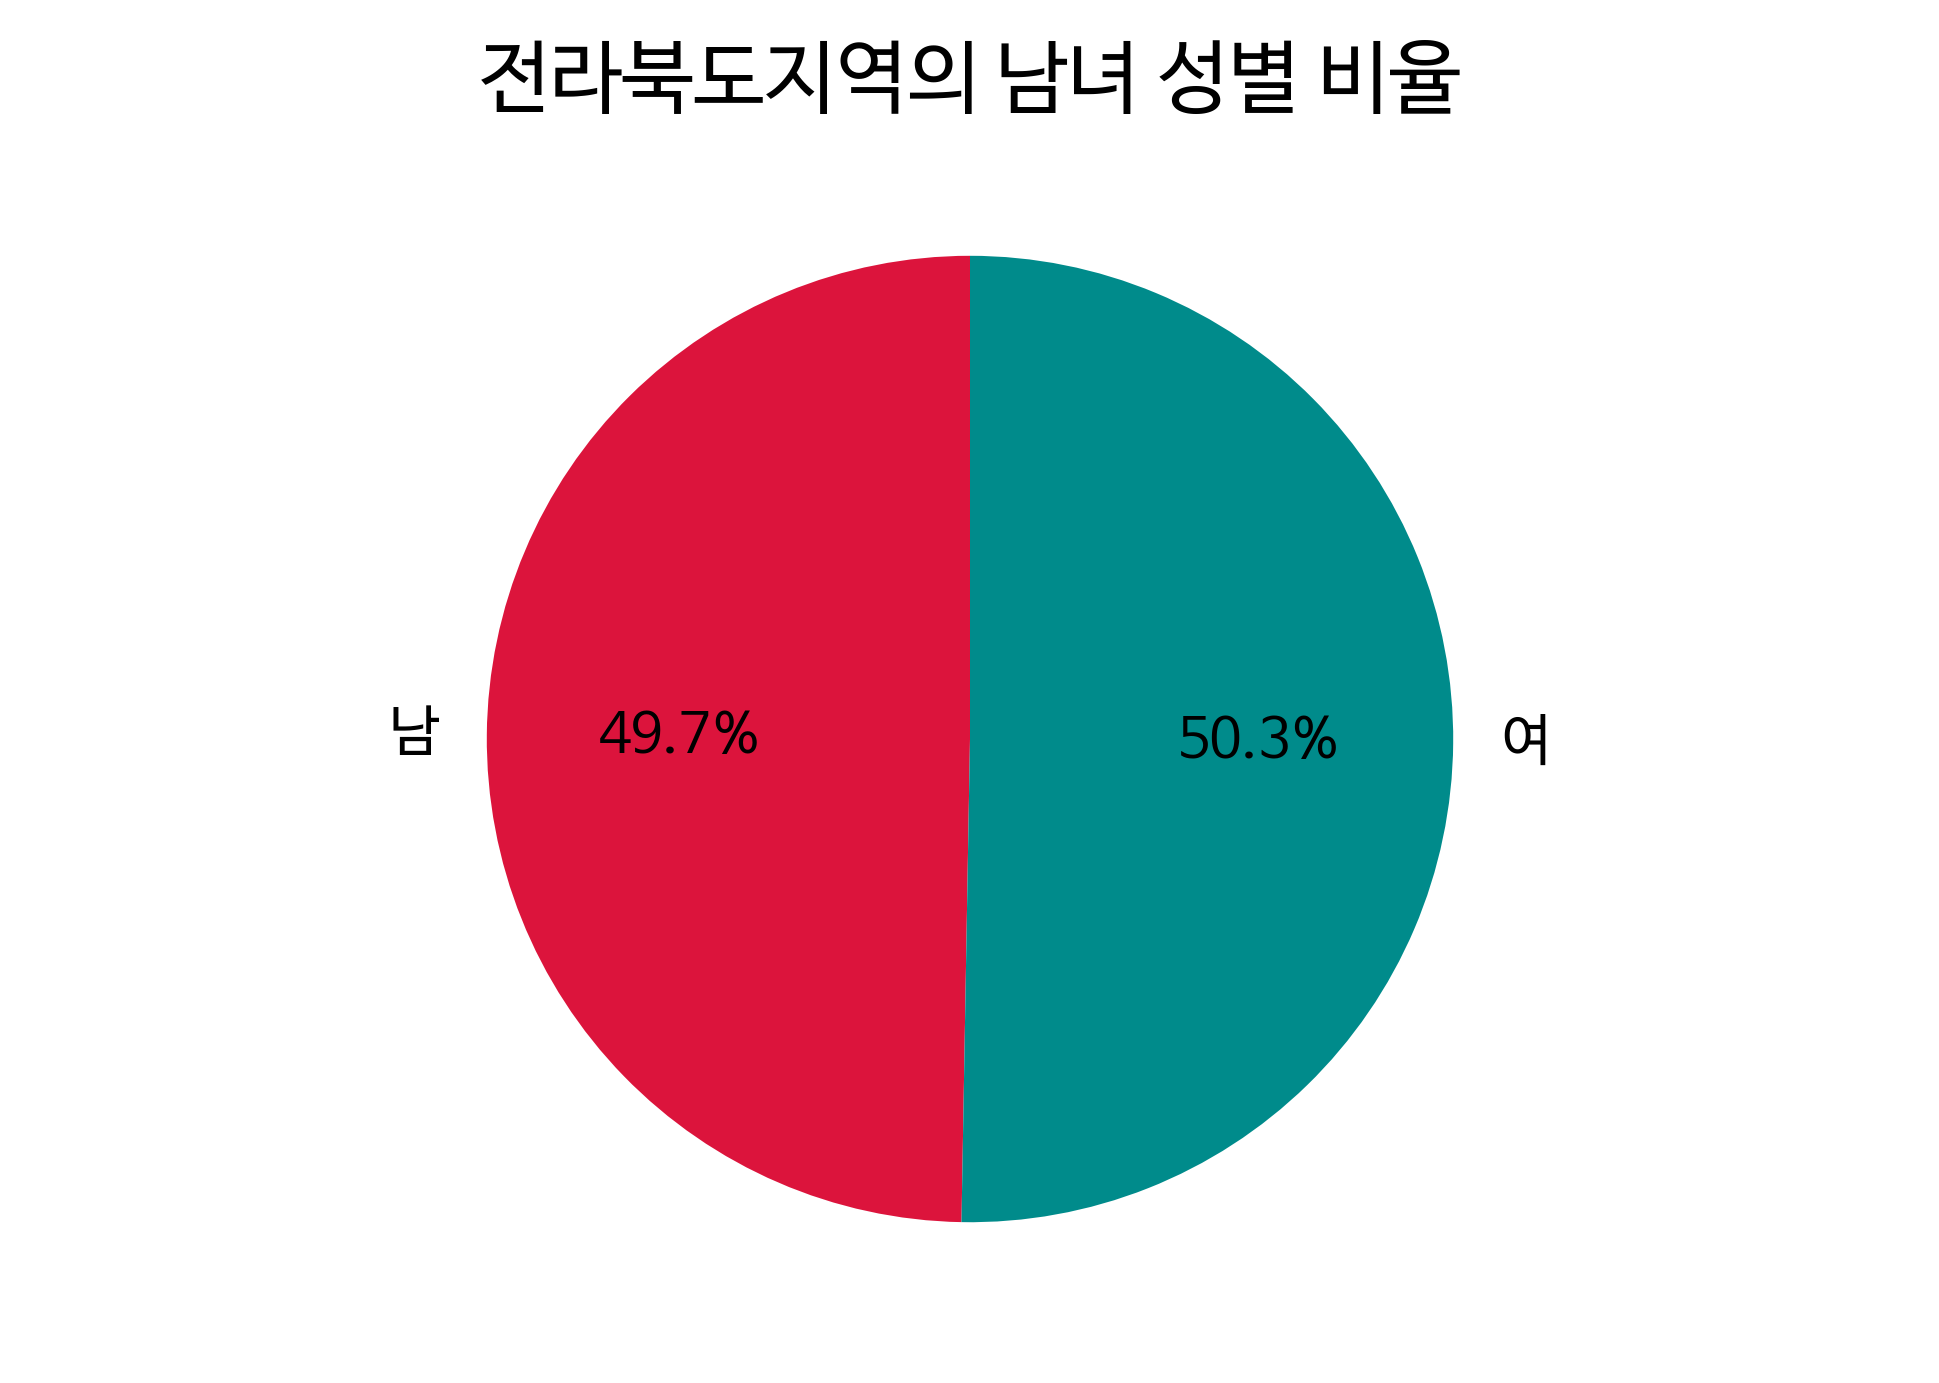

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv',encoding="cp949")
data = csv.reader(f)

size=[] #제주도의 남성 인구 합계, 여성 인구 합계
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')

for row in data:
  if name in row[0]:
    m = 0 #남성 인구수 합계 변수
    f = 0 #여성 인구수 합계 변수
    for i in range(101):
      m += int(row[i+3].replace(',',''))
      f += int(row[i+106].replace(',',''))
    break
size.append(m)
size.append(f)

plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
color = ['crimson', 'darkcyan']
label=['남','여']
plt.axis('equal')

plt.pie(size,labels=label, autopct='%.1f%%', colors=color, startangle=90)
plt.title(name+'지역의 남녀 성별 비율')
plt.style.use('ggplot') #격자 무늬 스타일로 지정

